## Import Libraries

In [12]:
%run Library_Imports.ipynb

## Load Dataset

In [13]:
# load data in 

covid_df = pd.read_csv("covid.csv")

In [14]:
covid_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


## Visualisation Ideas 
 
- How many people are intubated 
- How many people are intubated x other factors - analysis of how existing conditions effects intubation
- Date range between symptoms and death
- Effect of Obesity
- Impact on people with Immunosuppression

##### Additional analysis ideas
- Date range of inpatients - analyse admissions trend
- Inpatient to outpatient comparison per week + line of total cases per week - turn over analysis and bed trends

### Count of intubated 

##### Outcome: Shows that a large number (2 category) where not intubated. This skew will have an affect on our models.

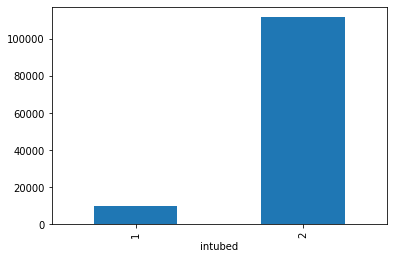

In [4]:
known_intubed = covid_df[covid_df.intubed <= 97]
known_intubed.groupby('intubed').id.count().plot.bar(ylim=0)
plt.show()

### Intubation x Other Lung Factors

##### Outcome: Shows that the factors do have an impact on intubation but it is hard to get the scale of this due to the skew in the data and plotting chosen.

In [5]:
intubation_vs_other = covid_df[['id', 'intubed', 'pneumonia','copd','asthma','tobacco']]
intubation_vs_other.head()

,id,intubed,pneumonia,copd,asthma,tobacco
0,16169f,97,2,2,2,2
1,1009bf,97,2,2,2,2
2,167386,2,2,2,2,2
3,0b5948,2,1,2,2,2
4,0d01b5,2,2,2,2,2


In [6]:
# clear out values that are representative of Nan and drop these

intubation_vs_other = intubation_vs_other.replace([97, 98,99], np.nan)
intubation_vs_other = intubation_vs_other.dropna(axis=0)

In [8]:
# subset dataframes into those that were and weren't intubated

intubed_true = intubation_vs_other.loc[intubation_vs_other['intubed'] == 1]
intubed_false = intubation_vs_other.loc[intubation_vs_other['intubed'] == 2]

In [10]:
# create list of intubated data with other factors for plotting

intubed_yes = [intubed_true['pneumonia'].to_numpy().sum(),
               intubed_true['copd'].to_numpy().sum(),
               intubed_true['asthma'].to_numpy().sum(),
               intubed_true['tobacco'].to_numpy().sum()]
intubed_no = [intubed_false['pneumonia'].to_numpy().sum(),
               intubed_false['copd'].to_numpy().sum(),
               intubed_false['asthma'].to_numpy().sum(),
               intubed_false['tobacco'].to_numpy().sum()]


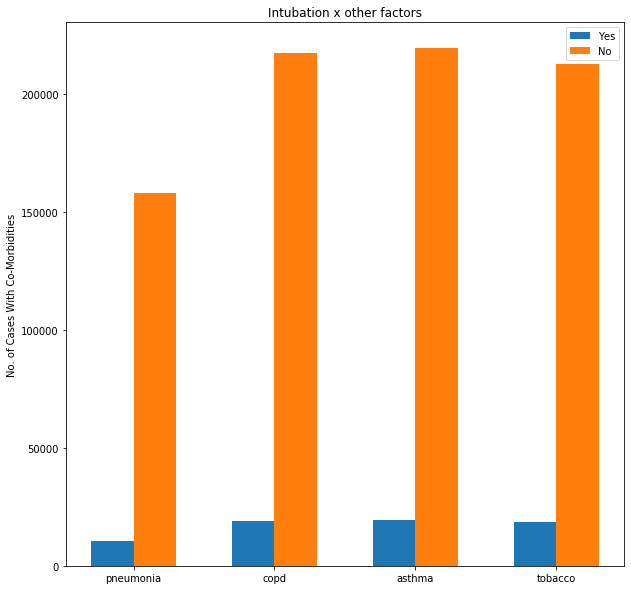

In [24]:
# Position of bars on x-axis
ind = np.arange(len(intubed_no))

# Figure size
plt.figure(figsize=(10,10))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, intubed_yes , width, label='Yes')
plt.bar(ind + width, intubed_no, width, label='No')

plt.ylabel('No. of Cases With Co-Morbidities')
plt.title('Intubation x other factors')

col_names = intubed_true.columns.values[2:]

plt.xticks(ind + width / 2, col_names)

plt.legend(loc='best')
plt.show()

### Date Range between symptoms and death 

##### Outcome: Can see that people are more likely to die within the first 7 days

In [12]:
symptoms_death = covid_df[['date_symptoms', 'date_died']]

# drop 9999-99-99 - means no death
symptoms_death = symptoms_death[~symptoms_death['date_died'].str.contains("9999-99-99")]

symptoms_death['date_symptoms'] = pd.to_datetime(symptoms_death['date_symptoms'], format='%d-%m-%Y')
symptoms_death['date_died'] = pd.to_datetime(symptoms_death['date_died'], format='%d-%m-%Y')

# create a new column showing day difference 
symptoms_death['days_difference'] = (symptoms_death['date_died'] - symptoms_death['date_symptoms']).dt.days


In [13]:
symptoms_death.head()

,date_symptoms,date_died,days_difference
4,2020-04-13,2020-04-22,9
5,2020-04-16,2020-04-29,13
24,2020-05-06,2020-05-21,15
36,2020-04-27,2020-04-28,1
41,2020-04-23,2020-04-26,3


In [14]:
symptoms_death = symptoms_death[symptoms_death['days_difference'] >= 0]
symptoms_death.head()

,date_symptoms,date_died,days_difference
4,2020-04-13,2020-04-22,9
5,2020-04-16,2020-04-29,13
24,2020-05-06,2020-05-21,15
36,2020-04-27,2020-04-28,1
41,2020-04-23,2020-04-26,3


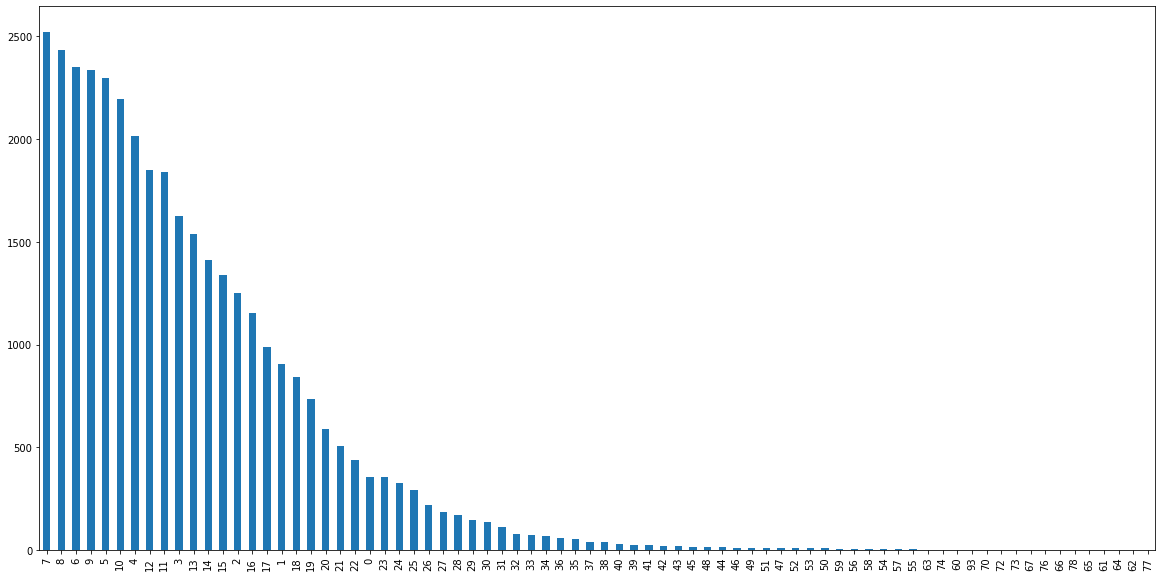

In [15]:
plt.figure(figsize=(20,10))
symptoms_death['days_difference'].value_counts().plot.bar(ylim=0)
plt.show()

### Obesity affecting Intubation

##### Outcome:  Few (in relation to dataset size) that are diagnosed as obese are intubated - there is no real correlation 

In [16]:
obesity_vs_intubed = covid_df[['id', 'intubed', 'obesity']]

In [17]:
obesity_vs_intubed.head()

,id,intubed,obesity
0,16169f,97,2
1,1009bf,97,2
2,167386,2,1
3,0b5948,2,2
4,0d01b5,2,2


In [18]:
# remove unknown intubed values
obesity_vs_intubed = obesity_vs_intubed.replace([97, 98,99], np.nan)
obesity_vs_intubed = obesity_vs_intubed.dropna(axis=0)

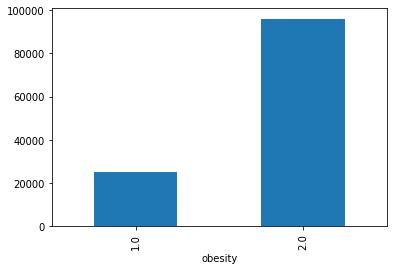

In [19]:
obesity_vs_intubed.groupby('obesity').intubed.count().plot.bar(ylim=0)
plt.show()

# number of those diagnosed with obesity that were intubed (1 - obesity diagnosed, 2 - not) ie not correlated

### Immunosupression

##### Outcome: Very few that have Immunosuppression are intubated, these are not correlated. An assumption could be made that this was due to severity of lockdowns and isolation for these individuals resulting in less contrations of COVID. 

#### Affects on Intubed

In [20]:
immuno_intubed = covid_df[['id', 'intubed', 'inmsupr']]
# remove unknown intubed values
immuno_intubed = immuno_intubed.replace([97, 98,99], np.nan)
immuno_intubed = immuno_intubed.dropna(axis=0)

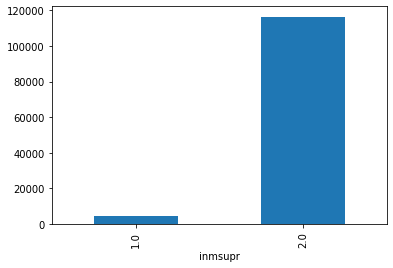

In [21]:
immuno_intubed.groupby('inmsupr').intubed.count().plot.bar(ylim=0)
plt.show()

# inmunosupression has little affect on intubation 

#### Deaths 

##### Outcome: Of those that were immunisupressed and intubated, there was a higher likelihood of not dying. 

In [22]:
immuno_deaths = rona_df[['id', 'intubed', 'date_died']]
# remove unknown intubed values
immuno_deaths = immuno_deaths.replace([97, 98,99], np.nan)
immuno_deaths = immuno_deaths.dropna(axis=0)

# alter 9999-99-99 - means no death
immuno_deaths.date_died = np.where(immuno_deaths.date_died == '9999-99-99', 0, immuno_deaths.date_died)
immuno_deaths.date_died = np.where(immuno_deaths.date_died != 0, 1, immuno_deaths.date_died)

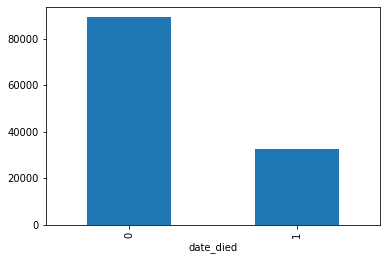

In [23]:
immuno_deaths.groupby('date_died').intubed.count().plot.bar(ylim=0)
plt.show()
